# Correlation Fit

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import model
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
prep_data = model.data_and_network_prep()

In [3]:
data_for_fit_i = model.create_data_for_fit_influenza()
data_for_fit_v = model.create_data_for_fit(prep_data)

## Vaccination model

Load results

In [4]:
# Get list of files
file_names = os.listdir('L:/Dor/Data/vaccination_model/model_results')

# Merge lists
model_results_all = []
for file_name in file_names:
    with open(f'L:/Dor/Data/vaccination_model/model_results/{file_name}', 'rb') as pickle_in:
        cur_res = pickle.load(pickle_in)
    model_results_all.extend(cur_res)

# Get Results and likelihood lists 
model_results_list = [res['model_results'] for res in model_results_all]
model_res_likelihood_list = [res['likelihood'] for res in model_results_all]

# Get median realization
med = np.argsort(np.array(model_res_likelihood_list))[len(model_res_likelihood_list)//2]
median_model_results = model_results_list[med]

Load results homogenous

In [4]:
# Get list of files
file_names = os.listdir('L:/Dor/Data/vaccination_model/model_results_homo/')

# Merge lists
model_results_all_homo = []
for file_name in file_names:
    with open(f'L:/Dor/Data/vaccination_model/model_results_homo/{file_name}', 'rb') as pickle_in:
        cur_res = pickle.load(pickle_in)
    model_results_all_homo.extend(cur_res)

# Get Results and likelihood lists 
model_results_list_homo = [res['model_results'] for res in model_results_all_homo][:100]
model_res_likelihood_list_homo = [res['likelihood'] for res in model_results_all_homo][:100]

# Get median realization
med_homo = np.argsort(np.array(model_res_likelihood_list_homo))[len(model_res_likelihood_list_homo)//2]
median_model_results_homo = model_results_list_homo[med_homo]

In [5]:
len(model_res_likelihood_list_homo)

92

In [18]:
model_res_likelihood_list[med]

63988.87193888805

In [6]:
model_res_likelihood_list_homo[med_homo]

63932.15428404272

#### Correlation fit (not weighted)

In [5]:
print(f'correlation fit aggregated: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data):.2f}')
print(f'correlation fit by subdist: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data, by_subdist=True):.2f}')
print(f'correlation fit by subdist and age: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data, by_subdist_age=True):.2f}')

TypeError: unsupported format string passed to tuple.__format__

#### Correlation fit weighted

In [6]:
print(f'correlation fit aggregated: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data, weighted=True):.2f}')
print(f'correlation fit by subdist: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data, by_subdist=True, weighted=True):.2f}')
print(f'correlation fit by subdist and age: {model.calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data, by_subdist_age=True, weighted=True):.2f}')

correlation fit aggregated: 0.95
correlation fit by subdist: 0.87
correlation fit by subdist and age: 0.85


#### Smoothed weighted

In [10]:
window = 2

vacc_agg = model.calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data, weighted=True, smooth=True, window=window)
vacc_subdist = model.calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data, by_subdist=True, weighted=True, smooth=True, window=window)
vacc_subdist_age = model.calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data, by_subdist_age=True, weighted=True, smooth=True, window=window)
print(f'correlation fit aggregated: r:{vacc_agg[0]:.2f}, p:{vacc_agg[1]}')
print(f'correlation fit by subdist: r:{vacc_subdist[0]:.2f}, p:{vacc_subdist[1]}')
print(f'correlation fit by subdist and age: r:{vacc_subdist_age[0]:.2f}, p:{vacc_subdist_age[1]}')

correlation fit aggregated: r:0.96, p:3.395593273556636e-15
correlation fit by subdist: r:0.88, p:0.00032279767488544337
correlation fit by subdist and age: r:0.86, p:0.00037117001279150926


Homogenous model

In [10]:
window = 2

vacc_agg_h = model.calc_correlation_fit_vacc(median_model_results_homo, data_for_fit_v, prep_data, weighted=True, smooth=True, window=window)
vacc_subdist_h = model.calc_correlation_fit_vacc(median_model_results_homo, data_for_fit_v, prep_data, by_subdist=True, weighted=True, smooth=True, window=window)
vacc_subdist_age_h = model.calc_correlation_fit_vacc(median_model_results_homo, data_for_fit_v, prep_data, by_subdist_age=True, weighted=True, smooth=True, window=window)
print(f'correlation fit aggregated: r:{vacc_agg_h[0]:.2f}, p:{vacc_agg_h[1]}')
print(f'correlation fit by subdist: r:{vacc_subdist_h[0]:.2f}, p:{vacc_subdist_h[1]}')
print(f'correlation fit by subdist and age: r:{vacc_subdist_age_h[0]:.2f}, p:{vacc_subdist_age_h[1]}')

correlation fit aggregated: r:0.94, p:3.9604365046065027e-13
correlation fit by subdist: r:0.93, p:1.8068421029970448e-11
correlation fit by subdist and age: r:0.91, p:4.28535343677451e-08


## Coupled model

Load results

In [13]:
# Get list of files
# path = 'L:/Dor/Data/coupled_model/model_results'
# path = 'L:/Dor/Data/coupled_model/model_results_new'
path = 'L:/Dor/Data/coupled_model/model_results_correction'
file_names = os.listdir(path)#[:-1]


# Merge lists
model_results_all_coupled = []
for file_name in file_names:
    with open(f'{path}/{file_name}', 'rb') as pickle_in:
        cur_res = pickle.load(pickle_in)
    model_results_all_coupled.extend(cur_res)
    
# Get Results list 
model_results_list_coupled = [res['model_results'] for res in model_results_all_coupled]

# Get likelihood list by season
likelihood_lists = {season: [] for season in model.seasons}
for res in model_results_all_coupled:
    for season, likelihood in res['likelihood_by_season'].items():
        likelihood_lists[season].append(likelihood)
        
# Get median realization
meds_coupled = {season: np.argsort(np.array(likelihood_lists[season]))[len(likelihood_lists[season])//2]
                for season in model.seasons}
median_model_results_coupled = {season: model_results_list_coupled[meds_coupled[season]][s]
                                for s, season in enumerate(model.seasons)}

#### Correlation fit (not weighted)

In [14]:
corr_agg = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season)
            for season in model.seasons]

corr_subdist = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist=True)
                for season in model.seasons]

corr_subdist_age = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist_age=True)
                    for season in model.seasons]

In [15]:
print(f'correlation fit aggregated: {np.array(corr_agg).mean():.2f}')
print(f'correlation fit by subdist: {np.array(corr_subdist).mean():.2f}')
print(f'correlation fit by subdist and age: {np.array(corr_subdist_age).mean():.2f}')

correlation fit aggregated: 0.46
correlation fit by subdist: 0.39
correlation fit by subdist and age: 0.36


#### Correlation fit weighted

In [16]:
corr_agg_w = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, weighted=True)
              for season in model.seasons]

corr_subdist_w = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist=True, weighted=True)
                  for season in model.seasons]

corr_subdist_age_w = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist_age=True, weighted=True)
                      for season in model.seasons]

In [17]:
print(f'correlation fit aggregated: {np.array(corr_agg_w).mean():.2f}')
print(f'correlation fit by subdist: {np.array(corr_subdist_w).mean():.2f}')
print(f'correlation fit by subdist and age: {np.array(corr_subdist_age_w)[1:].mean():.2f}')

correlation fit aggregated: 0.46
correlation fit by subdist: 0.41
correlation fit by subdist and age: 0.38


#### Correlation fit weighted smoothed

In [18]:
window = 4

corr_agg_ws = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, weighted=True, smooth=True, window=window)[0]
               for season in model.seasons]

corr_subdist_ws = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist=True, weighted=True, smooth=True, window=window)[0]
                   for season in model.seasons]

corr_subdist_age_ws = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist_age=True, weighted=True, smooth=True, window=window)[0]
                       for season in model.seasons]

# p-values
corr_agg_ws_p = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, weighted=True, smooth=True, window=window)[1]
                 for season in model.seasons]

corr_subdist_ws_p = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist=True, weighted=True, smooth=True, window=window)[1]
                     for season in model.seasons]

corr_subdist_age_ws_p = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist_age=True, weighted=True, smooth=True, window=window)[1]
                         for season in model.seasons]

In [19]:
print(f'correlation fit aggregated: r:{np.array(corr_agg_ws).mean():.2f}, p: {np.array(corr_agg_ws_p).mean()}')
print(f'correlation fit by subdist: r:{np.array(corr_subdist_ws).mean():.2f}, p:{np.array(corr_subdist_ws_p).mean()}')
print(f'correlation fit by subdist and age: r:{np.array(corr_subdist_age_ws)[1:].mean():.2f}, p:{np.array(corr_subdist_age_ws_p).mean()}')

correlation fit aggregated: r:0.95, p: 1.4840924534564043e-17
correlation fit by subdist: r:0.89, p:1.8258565173012053e-08
correlation fit by subdist and age: r:0.87, p:6.4388325234674e-05


In [22]:
corr_subdist_age_ws

[0.9064226587381063,
 0.8352750813771467,
 0.8968688700975459,
 0.8353652783126296,
 0.817822647417894,
 0.9200988442912686,
 0.8855348244134025]

#### Correlation fit weighted

In [76]:
corr_agg_w = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, weighted=True)
              for season in model.seasons]

corr_subdist_w = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist=True, weighted=True)
                  for season in model.seasons]

corr_subdist_age_w = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist_age=True, weighted=True)
                      for season in model.seasons]

In [19]:
print(f'correlation fit aggregated: {np.array(corr_agg_w).mean():.2f}')
print(f'correlation fit by subdist: {np.array(corr_subdist_w).mean():.2f}')
print(f'correlation fit by subdist and age: {np.array(corr_subdist_age_w)[1:].mean():.2f}')

correlation fit aggregated: 0.92
correlation fit by subdist: 0.82
correlation fit by subdist and age: 0.76


In [21]:
from scipy.stats import pearsonr

In [23]:
pearsonr([1,2,3],[4,5,7])

(0.9819805060619659, 0.1210377183236763)

In [31]:
x, y = calc_correlation_fit_vacc(median_model_results, data_for_fit_v, prep_data, by_subdist_age=True)

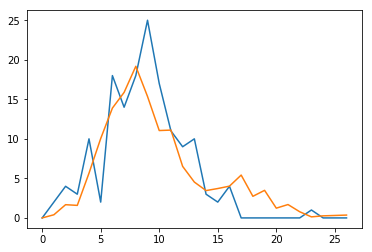

In [62]:
plt.plot(x)
plt.plot(y)

smoothing

In [92]:
window = 5

In [93]:
xx = pd.DataFrame(np.concatenate([[0]*(window-1),x]))
xxx = xx.rolling(window).mean()[0].values[window-1:]
xxx

array([ 0. ,  0.4,  1.2,  1.8,  3.8,  4.2,  7.4,  9.4, 12.4, 15.4, 18.4,
       17. , 16. , 14.4, 10. ,  7. ,  5.6,  3.8,  1.8,  1.2,  0.8,  0. ,
        0. ,  0.2,  0.2,  0.2,  0.2])

In [94]:
yy = pd.DataFrame(np.concatenate([[0]*(window-1),y]))
yyy = yy.rolling(window).mean()[0].values[window-1:]
yyy

array([ 0.        ,  0.07951452,  0.4139889 ,  0.73098128,  1.86221452,
        3.87025108,  6.56854001,  9.40922373, 12.927701  , 14.86851171,
       15.07058646, 14.51416961, 12.64257235,  9.71354168,  7.33298757,
        5.86617723,  4.44851831,  4.22876726,  3.86898173,  3.87499875,
        3.37842464,  2.91296618,  1.98504651,  1.46499837,  0.8198126 ,
        0.63493013,  0.36844399])

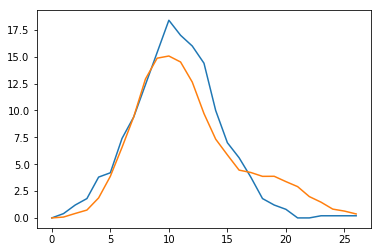

In [95]:
plt.plot(xxx)
plt.plot(yyy)

In [74]:
np.corrcoef(x,y)[0,1]

0.8729318316309967

In [96]:
np.corrcoef(xxx,yyy)[0,1]

0.9629804831893652

In [100]:
get_vacc_model_weekly_cases = model.get_vacc_model_weekly_cases

def calc_correlation_fit_vacc(model_results, data_for_fit, prep_data, by_subdist=False, by_subdist_age=False, weighted=False, smooth=False, window=None):
    # If aggregated correlation fit
    if by_subdist_age:
        # Get model weekly cases by subdist and age
        # Initialize a dict for infected by subdist and age
        I_by_subdist_age = {(subdist, age): np.array([0] * 181) for subdist, age in prep_data['relevant_subdists_age']}

        # Go over clinic and sum the data to subdist leve
        for (clinic, age), data in model_results['infected_by_clinic_age'].items():
            subdist = prep_data['clinics_stat_areas'].loc[clinic].subdist
            I_by_subdist_age[(subdist, age)] = I_by_subdist_age[(subdist, age)] + data

        # Get dates for aggregation
        dates = [pd.Timestamp(2016, 9, 1) + pd.Timedelta(i, unit='d') for i in range(181)]

        # Go over subdists and age groupsand aggregate weekly
        model_weekly_vacc_by_subdist_age = {}
        for subdist, age in prep_data['relevant_subdists_age']:
            # Create a DF of the cases with the dates as index
            model_vacc_df = pd.DataFrame(I_by_subdist_age[(subdist, age)], index=np.array(dates), columns=['vacc_count'])
            # Aggregate weekly
            model_weekly_vacc = model_vacc_df.resample('W').sum().fillna(0).copy()
            # Save to dict
            model_weekly_vacc_by_subdist_age[(subdist, age)] = model_weekly_vacc.vacc_count.values

        # Go over subdists and age groups and calculate correlation
        corrs = {}
        for subdist, age in prep_data['relevant_subdists_age']:
            # Model weekly vaccination for current subdist and age
            model_weekly_vacc = model_weekly_vacc_by_subdist_age[(subdist, age)]

            # Data weekly vaccination for current subdsit and age
            data_weekly_vacc = data_for_fit['data_for_fit_subdist'][(subdist, age)].vacc_count.values
            
            # Smooth
            if smooth:
                # Smooth model
                model_weekly_vacc = pd.DataFrame(np.concatenate([[0]*(window-1), model_weekly_vacc]))
                model_weekly_vacc = model_weekly_vacc.rolling(window).mean()[0].values[window-1:]
                # Smooth data
                data_weekly_vacc = pd.DataFrame(np.concatenate([[0]*(window-1), data_weekly_vacc]))
                data_weekly_vacc = data_weekly_vacc.rolling(window).mean()[0].values[window-1:]
                               
            # Calculate correlation for current subdist
            corrs[(subdist, age)] = np.corrcoef(data_weekly_vacc, model_weekly_vacc)[0, 1]

        # If weighted - return weighted average of correlation fit
        if weighted:
            # Calculate population proportion by subdist and age
            pop_prop_by_subdist = prep_data['population_by_clinic_age'].reset_index().groupby(['subdist', 'age']).sum().prop_network
            return sum([pop_prop_by_subdist.loc[key]*corr for key, corr in corrs.items()])

        else:  # not weighted
            # Return average correlation
            return sum(list(corrs.values())) / len(list(corrs.values()))

    elif by_subdist:  # correlation fit by subdist
        # Get model weekly cases by subdist
        # Initialize a dict for infected by subdist
        I_by_subdist = {subdist: np.array([0] * 181) for subdist in prep_data['relevant_subdists']}

        # Go over clinic and sum the data to subdist leve
        for (clinic, age), data in model_results['infected_by_clinic_age'].items():
            subdist = prep_data['clinics_stat_areas'].loc[clinic].subdist
            I_by_subdist[subdist] = I_by_subdist[subdist] + data

        # Get dates for aggregation
        dates = [pd.Timestamp(2016, 9, 1) + pd.Timedelta(i, unit='d') for i in range(181)]

        # Go over subdist and aggregate weekly
        model_weekly_vacc_by_subdist = {}
        for subdist in prep_data['relevant_subdists']:
            # Create a DF of the cases with the dates as index
            model_vacc_df = pd.DataFrame(I_by_subdist[subdist], index=np.array(dates), columns=['vacc_count'])
            # Aggregate weekly
            model_weekly_vacc = model_vacc_df.resample('W').sum().fillna(0).copy()
            # Save to dict
            model_weekly_vacc_by_subdist[subdist] = model_weekly_vacc.vacc_count.values

        # Go over subdists and calculate correlation
        corrs = {}
        for subdist in prep_data['relevant_subdists']:
            # Model weekly vaccination for current subdist
            model_weekly_vacc = model_weekly_vacc_by_subdist[subdist]
        
            # Data weekly vaccination for current subdsit
            data_weekly_vacc = data_for_fit['data_for_fit_subdist'][(subdist, 0)].vacc_count.values +\
                               data_for_fit['data_for_fit_subdist'][(subdist, 1)].vacc_count.values
            
            # Smooth
            if smooth:
                # Smooth model
                model_weekly_vacc = pd.DataFrame(np.concatenate([[0]*(window-1), model_weekly_vacc]))
                model_weekly_vacc = model_weekly_vacc.rolling(window).mean()[0].values[window-1:]
                # Smooth data
                data_weekly_vacc = pd.DataFrame(np.concatenate([[0]*(window-1), data_weekly_vacc]))
                data_weekly_vacc = data_weekly_vacc.rolling(window).mean()[0].values[window-1:]

            # Calculate correlation for current subdist
            corrs[subdist] = np.corrcoef(data_weekly_vacc, model_weekly_vacc)[0, 1]
            
        # If weighted - return weighted average of correlation
        if weighted:
            # Calculate population proportion by subdist and age
            pop_prop_by_subdist = prep_data['population_by_clinic_age'].reset_index().groupby(['subdist', 'age']).sum().prop_network
            return sum([(pop_prop_by_subdist.loc[(subdist, 0)] + pop_prop_by_subdist.loc[(subdist, 1)]) * corr
                       for subdist, corr in corrs.items()])

        else:  # not weighted
            # Return average correlation
            return sum(list(corrs.values())) / len(list(corrs.values()))

    # If aggregated correlation fit
    else:
        # Get model weekly cases
        model_weekly_vacc = get_vacc_model_weekly_cases(model_results).vacc_count.values

        # Get vaccination data weekly cases
        data_weekly_vacc = data_for_fit['infected_data_agg'].vacc_count.values
        
        # Smooth
        if smooth:
            # Smooth model
            model_weekly_vacc = pd.DataFrame(np.concatenate([[0]*(window-1), model_weekly_vacc]))
            model_weekly_vacc = model_weekly_vacc.rolling(window).mean()[0].values[window-1:]
            # Smooth data
            data_weekly_vacc = pd.DataFrame(np.concatenate([[0]*(window-1), data_weekly_vacc]))
            data_weekly_vacc = data_weekly_vacc.rolling(window).mean()[0].values[window-1:]

        # Calculate correlation
        return np.corrcoef(data_weekly_vacc, model_weekly_vacc)[0, 1]

In [ ]:
def calc_correlation_fit_flu(model_results, data_for_fit, prep_data, season, by_subdist=False, by_subdist_age=False, weighted=False, smooth=False, window=None):
    # If aggregated correlation fit
    if by_subdist_age:
        # Initialize dict for weekly cases by subdist - all arrays of 0s
        Is_by_subdist = {subdist: np.array([0] * 365) for subdist in prep_data['relevant_subdists_age']}

        # Go over clinics and aggregate by subdists
        for (clinic, age), data in model_results['Is_by_clinic_age'].items():
            subdist = prep_data['clinics_stat_areas'].loc[clinic].subdist
            Is_by_subdist[(subdist, age)] = Is_by_subdist[(subdist, age)] + data

        # Get weekly cases for each subdist
        model_weekly_cases_by_subdist = {}
        for subdist, data in Is_by_subdist.items():
            model_weekly_cases_by_subdist[subdist] = get_model_weekly_cases(data, season, short=False, by_subdist=True)

        # Go over subdists and age groups and calculate correlation
        corrs = {}
        for subdist, age in prep_data['relevant_subdists_age']:
            # Model weekly vaccination for current subdist and age
            model_weekly_cases = model_weekly_cases_by_subdist[(subdist, age)].cases.values

            # Data weekly vaccination for current subdsit and age
            data_weekly_cases = data_for_fit['by_subdist'][(subdist, age)]

            # Get only relevant season
            data_weekly_cases = data_weekly_cases[data_weekly_cases.season == season].cases.values
            
            # Smooth
            if smooth:
                # Smooth model
                model_weekly_cases = pd.DataFrame(np.concatenate([[0]*(window-1), model_weekly_vacc]))
                model_weekly_cases = model_weekly_cases.rolling(window).mean()[0].values[window-1:]
                # Smooth data
                data_weekly_cases = pd.DataFrame(np.concatenate([[0]*(window-1), data_weekly_vacc]))
                data_weekly_cases = data_weekly_cases.rolling(window).mean()[0].values[window-1:]

            # Calculate correlation for current subdist
            corrs[(subdist, age)] = np.corrcoef(data_weekly_cases, model_weekly_cases)[0, 1]

        # If weighted - return weighted average of correlation fit
        if weighted:
            # Calculate population proportion by subdist and age
            pop_prop_by_subdist = prep_data['population_by_clinic_age'].reset_index().groupby(['subdist', 'age']).sum().prop_network
            return sum([pop_prop_by_subdist.loc[key]*corr for key, corr in corrs.items()])

        else:  # not weighted
            # Return average correlation
            return sum(list(corrs.values())) / len(list(corrs.values()))

    elif by_subdist:  # correlation fit by subdist
        # Get model weekly cases by subdist
        # Initialize dict for weekly cases by subdist - all arrays of 0s
        Is_by_subdist = {subdist: np.array([0] * 365) for subdist in prep_data['relevant_subdists']}

        # Go over clinics and aggregate by subdists
        for (clinic, age), data in model_results['Is_by_clinic_age'].items():
            subdist = prep_data['clinics_stat_areas'].loc[clinic].subdist
            Is_by_subdist[subdist] = Is_by_subdist[subdist] + data

        # Get weekly cases for each subdist
        model_weekly_cases_by_subdist = {}
        for subdist, data in Is_by_subdist.items():
            model_weekly_cases_by_subdist[subdist] = get_model_weekly_cases(data, season, short=False, by_subdist=True)

        # Go over subdists and age groups and calculate correlation
        corrs = {}
        for subdist, age in prep_data['relevant_subdists_age']:
            # Model weekly vaccination for current subdist and age
            model_weekly_cases = model_weekly_cases_by_subdist[subdist].cases.values

            # Data weekly vaccination for current subdsit and age
            data_weekly_cases = data_for_fit['by_subdist'][(subdist, 0)].copy()
            data_weekly_cases.cases += data_for_fit['by_subdist'][(subdist, 1)].cases

            # Get only relevant season
            data_weekly_cases = data_weekly_cases[data_weekly_cases.season == season].cases.values
            
            # Smooth
            if smooth:
                # Smooth model
                model_weekly_cases = pd.DataFrame(np.concatenate([[0]*(window-1), model_weekly_vacc]))
                model_weekly_cases = model_weekly_cases.rolling(window).mean()[0].values[window-1:]
                # Smooth data
                data_weekly_cases = pd.DataFrame(np.concatenate([[0]*(window-1), data_weekly_vacc]))
                data_weekly_cases = data_weekly_cases.rolling(window).mean()[0].values[window-1:]

            # Calculate correlation for current subdist
            corrs[subdist] = np.corrcoef(data_weekly_cases, model_weekly_cases)[0, 1]

        # If weighted - return weighted average of correlation
        if weighted:
            # Calculate population proportion by subdist and age
            pop_prop_by_subdist = prep_data['population_by_clinic_age'].reset_index().groupby(['subdist', 'age']).sum().prop_network
            return sum([(pop_prop_by_subdist.loc[(subdist, 0)] + pop_prop_by_subdist.loc[(subdist, 1)]) * corr
                       for subdist, corr in corrs.items()])

        else:  # not weighted
            # Return average correlation
            return sum(list(corrs.values())) / len(list(corrs.values()))

    # If aggregated correlation fit
    else:
        # Get model weekly cases
        model_weekly_cases = get_model_weekly_cases(model_results, season).cases.values

        # Get influenza data weekly cases
        data_weekly_cases = data_for_fit['total'][data_for_fit['total'].season == season].cases.values
        
        # Smooth
        if smooth:
            # Smooth model
            model_weekly_cases = pd.DataFrame(np.concatenate([[0]*(window-1), model_weekly_vacc]))
            model_weekly_cases = model_weekly_cases.rolling(window).mean()[0].values[window-1:]
            # Smooth data
            data_weekly_cases = pd.DataFrame(np.concatenate([[0]*(window-1), data_weekly_vacc]))
            data_weekly_cases = data_weekly_cases.rolling(window).mean()[0].values[window-1:]

        # Calculate correlation
        return np.corrcoef(data_weekly_cases, model_weekly_cases)[0, 1]